# Curvas PR

Las **curvas precision-recall (PR)** se usan para evaluar sistemas cuando conviene prestar especial atención a positivos ya que la noción de "negativo" no está bien definida. Por ejemplo, en detección de objetos en visión con patches, el número de verdaderos negativos depende del número de patches examinados. Otro ejemplo: en recuperación de información, el conjunto de negativos (documentos irrelevantes) depende del total de ítems recuperados. Tanto patches examinados como ítems recuperados son resultado de un algoritmo, no parte de la definición del problema.

## Precisión, cobertura y curva PR

La **precisión** se define como la fracción de positivos predichos que son verdad:
$$\mathcal{P}(\tau)%
=\frac{\operatorname{TP}_{\tau}}{\operatorname{TP}_{\tau}+\operatorname{FP}_{\tau}}%
=\frac{\operatorname{TP}_{\tau}}{\hat{P}_{\tau}}=\operatorname{PPV}_{\tau}$$
El **recall (cobertura)** es la fracción de positivos de verdad que son predichos:
$$\mathcal{R}(\tau)%
=\frac{\operatorname{TP}_{\tau}}{\operatorname{TP}_{\tau}+\operatorname{FN}_{\tau}}%
=\frac{\operatorname{TP}_{\tau}}{P}=\operatorname{TPR}_{\tau}$$
Llamamos **curva precision-recall (PR)** a la gráfica de $\mathcal{P}(\tau)$ en función de $\mathcal{R}(\tau)$, obtenida al variar $\tau$ de $0$ a $1$. Veamos un ejemplo sintético de curvas PR típicas; en este caso correspondientes a un clasificador A claramente mejor que otro B:

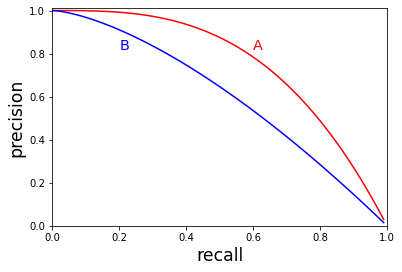

In [1]:
import numpy as np
import matplotlib.pyplot as plt
fA = np.vectorize(lambda x: 1 - x**3)
fB = np.vectorize(lambda x: 1 - x**(3/2))
x = np.arange(0, 1, 0.01)
plt.plot(x, fA(x), 'r-'); plt.plot(x, fB(x), 'b-')
plt.text(0.6, 0.82, 'A', color='red', size='x-large')
plt.text(0.2, 0.82, 'B', color='blue', size='x-large')
plt.axis([0, 1, 0, 1.01])
plt.xlabel('recall', size='xx-large'); plt.ylabel('precision', size='xx-large');

Las curvas PR de la figura son solo ejemplos de curvas PR que cabe esperar en la práctica; en teoría, sin embargo, las curvas PR pueden resultar muy distintas. Por ejemplo, de un clasificador aleatorio uniforme, $p(y=1\mid\boldsymbol{x})=\operatorname{Unif}(0, 1)$, cabe esperar una curva PR horizontal a la altura de la fracción de positivos reconocidos:
$$\begin{align*}
\mathcal{R}(\tau)&%
=\frac{\operatorname{TP}_{\tau}}{P}\approx\frac{P\cdot\tau}{P}=\tau\\
\mathcal{P}(\tau)&%
=\frac{\operatorname{TP}_{\tau}}{\hat{P}_{\tau}}\approx\frac{P\cdot\tau}{M\cdot\tau}=\frac{P}{M}
\end{align*}$$
Obviamente, es de esperar que nuestros clasificadores exhiban curvas PR claramente por encima de dicha horizontal. En general, cabe esperar curvas monótonamente decrecientes, como las de la figura, con el matiz de que la precisión para $\tau=1$ (recall $1$) no es nula, sino $P/M$. Ahora bien, a diferencia de un curva ROC, cuyo comportamiento es siempre monótono (creciente), las curvas PR no exhiben un comportamiento monótono (decreciente). Concretamente, si $\tau'\leq\tau$, entonces se cumple que $\mathcal{R}(\tau')\leq\mathcal{R}(\tau)$ pero puede ocurrir que $\mathcal{P}(\tau')<\mathcal{P}(\tau)$; de hecho, la precisión crece (ligeramente) cada vez que un pequeño incremento de $\tau$ añade un verdadero positivo. En el extremo más optimista, un clasificador "perfecto", de probabilidades $1$ para muestras positivas y $0$ para negativas, exhibirá una curva PR horizontal de precisión máxima salvo en $\tau=1$ (recall $1$), donde caerá abruptamente a precisión $P/M$.

## Resumen mediante un escalar

Al igual que una curva ROC, la calidad de una curva PR suele resumirse mediante alguna medida escalar para facilitar su comparación con otras curvas. Una medida usual es la precisión a un nivel de cobertura dado; en particular, la **precisión a $K$** se calcula con las $K$ muestras de mayor probabilidad. Otra medida usual el área bajo la curva PR o **average precision (AP)**, en todo el dominio de cobertura o hasta un nivel dado. Con el fin de evitar oscilaciones no mónotonas de la curva PR, la precisión a un nivel de cobertura dado se suele sustituir por la **precisión interpolada** o precisión máxima alcanzada con dicho nivel o mayor. Así, la **AP interpolada** denota el área bajo la **curva PR interpolada.** Por último, en problemas de $C$ clases abordados como $C$ problemas binarios, las $C$ curvas PR (interpoladas) correspondientes se suelen promediar para obtener un curva PR media a partir de la cual se calcula la **mean average precision (mAP).** 

## Clases desequilibradas

A diferencia de las curvas ROC, las curvas PR sí son sensibles al desequilibrio de clases. Consideremos el ratio de positivos a negativos en función de la fracción de positivos, $\pi=P/M$:
$$r=\frac{P}{N}=\frac{\pi}{1-\pi}$$
La precisión puede expresarse en función de $r$ como:
$$\mathcal{P}(\tau)%
=\frac{\operatorname{TP}_{\tau}}{\operatorname{TP}_{\tau}+\operatorname{FP}_{\tau}}%
=\frac{P\cdot\operatorname{TPR}_{\tau}}{P\cdot\operatorname{TPR}_{\tau}+N\cdot\operatorname{FPR}_{\tau}}%
=\frac{\operatorname{TPR}_{\tau}}{\operatorname{TPR}_{\tau}+\frac{1}{r}\cdot\operatorname{FPR}_{\tau}}$$
Claramente, $\;\lim\limits_{r\to\infty}\mathcal{P}(\tau)=1\;$ y $\;\lim\limits_{r\to 0}\mathcal{P}(\tau)=0$.